### Task 1: A classification example: fetal heart condition diagnosis
The UCI Machine Learning Repository contains several datasets that can be used to investigate different machine learning algorithms. In this exercise, we'll use a dataset of fetal heart diagnosis. The dataset contains measurements from about 2,600 fetuses. This is a classification task, where our task is to predict a diagnosis type following the FIGO Intrapartum Fetal Monitoring Guidelines: normal, suspicious, or pathological.


In [2]:
## Importing Libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier , GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold , cross_validate, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score ,mean_squared_error
import os

#### Step 1. Reading the data
This file contains the data that we will use. This file contains the same data as in the public distribution, except that we converted from Excel to CSV. Download the file and save it in a working directory.

In [3]:
# Read the CSV file.
data = pd.read_csv('CTG.csv', skiprows=1)

# Select the relevant numerical columns.
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
                 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
                 'Median', 'Variance', 'Tendency', 'NSP']

data = data[selected_cols].dropna()

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('NSP', axis=1)

# Map the diagnosis code to a human-readable label.
def to_label(y):
    return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)

# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

#### Step 2. Training the baseline classifier
We can now start to investigate different classifiers.

The DummyClassifier is a simple classifier that does not make use of the features: it just returns the most common label in the training set, in this case Spondylolisthesis. The purpose of using such a stupid classifier is as a baseline: a simple classifier that we can try before we move on to more complex classifiers.

To get an idea of how well our simple classifier works, we carry out a cross-validation over the training set and compute the classification accuracy on each fold.

The result is a NumPy array that contains the accuracies on the different folds in the cross-validation. Aggregate these scores so that you get a single score that you can use to compare different classifiers.

In [4]:
# create dummy model
clf = DummyClassifier(strategy='most_frequent')

# Cross Validation on Dummy classifier
dummyScores = cross_val_score(clf, Xtrain, Ytrain)

# Fit model
clf.fit(Xtrain,Ytrain)

dummy_score = np.mean(dummyScores)
print("Average score:",dummy_score)

Average score: 0.7805882352941176


##### Comments:

Here we aggregate the accuracy scores from the array by calculating the mean value from all the scores from the 5 fold. The performance 78%, which is not great and we should be able to beat this.

#### Step 3. Trying out some different classifiers
Replace the DummyClassifier with some more meaningful classifier and run the cross-validation again. Try out a few classifiers and see how much you can improve the cross-validation accuracy. Remember, the accuracy is defined as the proportion of correctly classified instances, and we want this value to be high.

You may also try to tune the hyperparameters of the various classifiers to improve the performance. For instance, the decision tree classifier has a parameter that sets the maximum depth, and in the neural network classifier you can control the number of layers and the number of neurons in each layer.

##### Comments:
In the coming section we will test two competing tree models against each other. Initially they will be run without any modification and after we will tune their respective hyperparameters and compare against each other, the competing models of our choice are:
 
1. Decision Tree
 
Decision Tree Regressor/classification (DTR) models have the structure as a hierarchical tree that utilizes the input data to answer questions. It can be thought of as a tree where each branch is split by a what if statement. It initiates by finding the most important feature and creates a rule that leads to more homenious datasets than the training set. When it finds that it recursively process to next level in the lower level and do the same logic
This leaves the tree structure with decision nodes and leaf nodes respectively. A node in this case can have two branches as a minimum, this node is a representation of the tested values. The leaf nodes represent the actual decision.
 
 
Modified Hyperparameters:
- max_depth: maximum depth of the tree.
- max_features: max features has three different ways to consider the best split (auto, sqrt, log2).
- min_samples_leaf: min samples leaf is the minimum amount of a sample to create a leaf node.
- random_state: random state is a random control that controls the randomly permuted split. It chooses either max_feature or n_feature, depending which of them are smallest. The best split is when these two parameters are equal to each other.
2. Gradient Boosting
 
GB uses the model with a forward stage-wise, by doing this the model can allow for optimization of the loss function which contains arbitrary differentiable.
 
Modified Hyperparameters:
- learning_rate: the learning rate is compressing the share for each tree.
- max_features: number of features to take into account when trying to find the best split of n_features. There are three different methods, but in the test we only used two of them, ['auto', 'sqrt'].
  - Auto: takes all of n features as a parameter
  - Sqrt: takes the square root of the n parameters aa the parameter
  - log2:
- max_depth: max depth limits the amount of nodes in the regression tree.
- min_samples_split: min samples split is the minimum amount of a sample to be splitted into a node.
- min_samples_leaf: min samples leaf is the minimum amount of a sample to create a leaf node.
3. Random Forest
 
Random Forest (RF) works as an estimator to classify numbers that belong to the decision tree, which contains samples from the dataset that was provided. In other words it works as an ensemble model that splits the input features in a collection of trees. RF uses an averaging technique to make its predictions of accuracy and overfitting control. If the hyperparameter bootstrap is set to true it will perform bootstrapping on the input data but if set to false it utilizes all data to construct the tree.
 
 
Modified Hyperparameters:
- max_depth: maximum depth of the tree.
- min_samples_split: min samples split is the minimum amount of a sample to be splitted into a node.
- min_samples_leaf: min samples leaf is teh minimum amount of a sample to create a leaf node.
- max_features: max features has three different ways to consider the best split.
 
 
 



In [5]:
# Create Gradient Boosting Classifier object
bgc = GradientBoostingClassifier()
# Fit model
bgc.fit(Xtrain,Ytrain)
# crossvalidate
CVS_GB = cross_val_score(bgc, Xtrain, Ytrain)

# Create Random Forest Classifier object
rfr = RandomForestClassifier(n_estimators = 100, random_state = 42)
# Fit model
rfr.fit(Xtrain,Ytrain)
# crossvalidate
CVS_RF = cross_val_score(rfr, Xtrain, Ytrain)

# Create Decision Tree Classifier object
dtc = DecisionTreeClassifier()
# Fit model
dtc.fit(Xtrain,Ytrain)
# crossvalidate
CVS_DT = cross_val_score(dtc, Xtrain, Ytrain )

In [6]:
## This part is just to merge model results nicely so it can be plotted in the plotting function below
lengthCross = list(range(1,len(CVS_DT)+1))

d = pd.DataFrame(CVS_DT)
d['Model'] = 'DecisionTreeClassifier'
d['CrossValidation'] = lengthCross

d1 = pd.DataFrame(CVS_RF)
d1['Model'] = 'RandomForestClassifier'
d1['CrossValidation'] = lengthCross

d2 = pd.DataFrame(CVS_GB)
d2['Model'] = 'GradientBoostingClassifier'
d2['CrossValidation'] = lengthCross

## Merge datadrames
frame = d.append(d1)
frame = frame.append(d2)

frame.columns = ['Accurancy', 'Model','CrossValidation']
#frame.head(7)

In [7]:
def plotlines(data):
    ## Reset Index to plot
    frame.reset_index(inplace=True)

    sns.set_theme(style="whitegrid")
    sns.set_context("talk", font_scale=1.1)
    
    plt.figure(figsize=(10,6))
    sns.lineplot(x="CrossValidation", 
                    y="Accurancy",
                    hue="Model",
                    data=frame)

    plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
    plt.title("Model Performance")
    plt.tight_layout()
    plt.gcf().set_size_inches((24, 6)) 

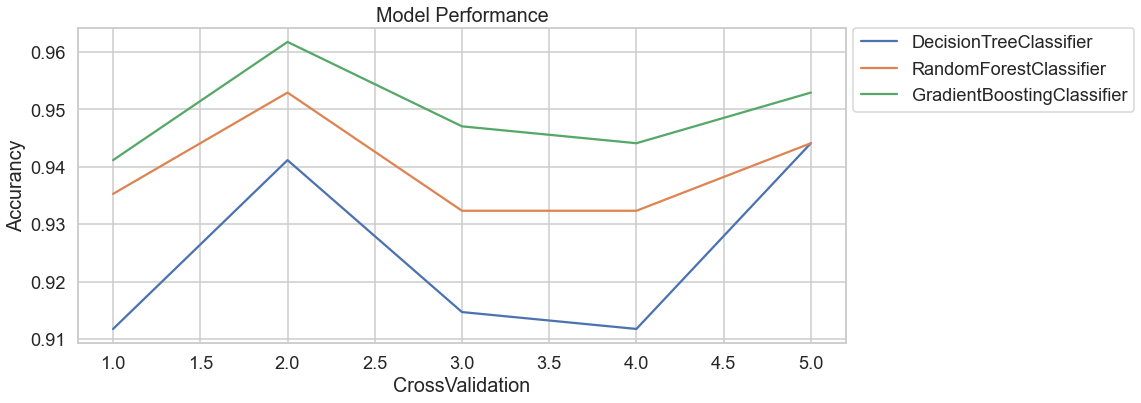

In [8]:
plotlines(frame)

##### Comments:
We see from our competing models that the GradientBoosting model is performing better than the other models for all tests in the cross validation. The Randomforest model is slightly behind and the Decision tree has the worst performance in general across the folds. 

Lets see if we can tune them to improve these results!

##### Tunning Hyperparameters - DecisionTreeClassifier

Bellow we will start to see if we can increase the performance of the Decisison tree then continue to the other models

In [9]:
# new decision tree classifier model
dt=DecisionTreeClassifier()

# specify grid
parameter_grid = {'max_depth': [1, 2, 3, 4, 5,6,7,8,9,10,15,20,30,40,50],
                  'max_features': [1, 2, 3, 4,5,6,7,8,9,10,12,14,16,18,19,21],
                 'random_state':[0, 1, 2, 3, 4, 5, 10, 15,20,35,50,80,100,150,180,200],
                  #'min_samples_split':[1, 2, 5, 7, 10, 15, 20, 30],
                  "min_samples_leaf": np.linspace(0.001, 0.03, 10),
                 'criterion':['gini','entropy'],
                 }

# Run the grid
grid_search = GridSearchCV(dt, param_grid = parameter_grid,cv =3)
# train 
grid_search.fit(Xtrain, Ytrain)

print ("Best Score: {}".format(grid_search.best_score_))
print ("Best params: {}".format(grid_search.best_params_))

Best Score: 0.943528333987698
Best params: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 19, 'min_samples_leaf': 0.001, 'random_state': 15}


In [10]:
# Create Decision Tree classifer object non tuned
dtc = DecisionTreeClassifier()
# train model
dtc.fit(Xtrain,Ytrain)
# cross validate non-tuned
CVS_DT = cross_val_score(dtc, Xtrain, Ytrain )

# Create Decision Tree classifer object tuned with identified best params
dtc_tuned = DecisionTreeClassifier(max_depth = 15 ,   # 20
                             criterion = 'entropy', #gini
                             max_features = 5,
                             min_samples_leaf = 1,
                             random_state = 2
                             )
# train
dtc_tuned.fit(Xtrain,Ytrain)                           
# cross-validate tuned
CVS_DT_Tuned = cross_val_score(dtc_tuned, Xtrain, Ytrain)

In [11]:
def structureHyperData(notTuned,isTuned):
    """ Function to structure data before plotting results"""
    
    d = pd.DataFrame(notTuned)
    d['Model'] = 'Not Tuned Model'
    d['CrossValidation'] = lengthCross

    d2 = pd.DataFrame(isTuned)
    d2['Model'] = 'Tuned Model'
    d2['CrossValidation'] = lengthCross

    ## Merge datadrames
    frame = d.append(d2)
    frame.columns = ['Accurancy', 'Model','CrossValidation']
    
    print('Average Non-Tuned Model: ' + str(round(np.mean(notTuned),3)))
    print('Average Tuned Model: ' + str(round(np.mean(isTuned),3)))

    return frame

Average Non-Tuned Model: 0.923
Average Tuned Model: 0.928


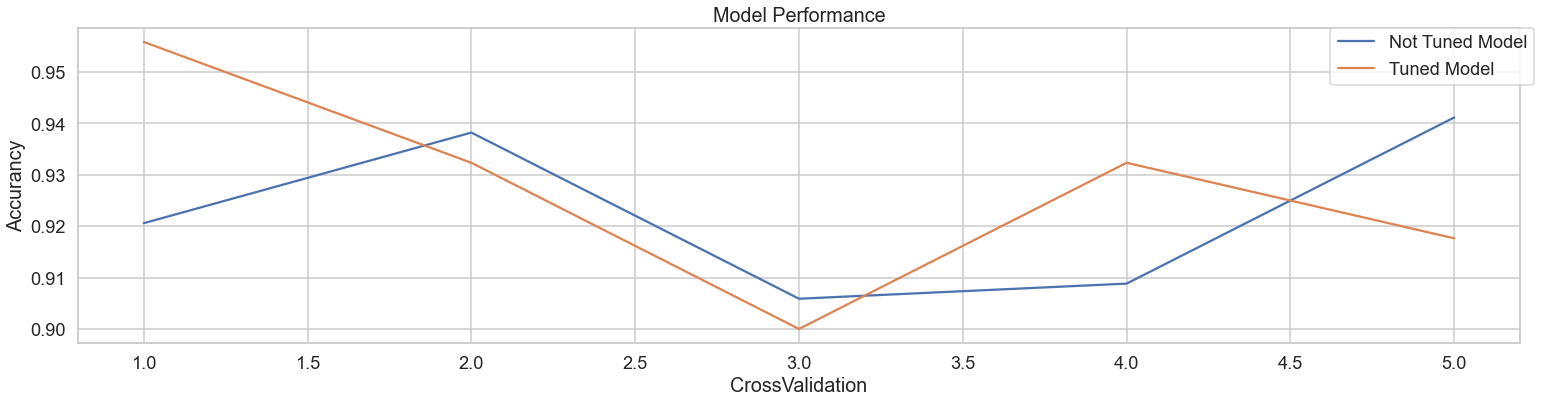

In [12]:
## plot results to see how we did
frame = structureHyperData(CVS_DT,CVS_DT_Tuned)
plotlines(frame)

##### Comments: DTC

The performance is very similar for both the tune and non-tuned model and the score is quite good at 92% for both models.

##### Tunning Hyperparameters - GradientBoostingClassifier

In [13]:
## specify grid
parameters = {
    #"loss":["deviance"],
    "learning_rate": [ 0.25 , 0.3 , 0.35, 0.4,0.5 ],
    "min_samples_leaf": np.linspace(0.001, 0.03, 10),
    "max_depth":[ 5,6,7,], 
    "max_features":["log2","sqrt"], 
    "criterion": ["friedman_mse",  "mse"],   
    }

#passing the scoring function in the GridSearchCV
clf = GridSearchCV(GradientBoostingClassifier(), parameters,  refit=False,cv=2, n_jobs=-1) # scoring=scoring,
# train
clf.fit(Xtrain, Ytrain)

print ("Best Score: {}".format(clf.best_score_))
print ("Best params: {}".format(clf.best_params_))

Best Score: 0.953529411764706
Best params: {'criterion': 'friedman_mse', 'learning_rate': 0.4, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 0.010666666666666665}


In [14]:
# Create GBC object non tuned
bgc = GradientBoostingClassifier()
# train
bgc.fit(Xtrain, Ytrain)
# cross validate non-tuned
CVS_GB_noTune = cross_val_score(bgc, Xtrain, Ytrain )

# create GBC tuned
bgc_tuned = GradientBoostingClassifier(
                                criterion = 'friedman_mse',
                                 learning_rate = 0.4 ,
                                 max_depth = 7 ,
                                 max_features = 'sqrt',
                                 min_samples_leaf = 0.013888) 

# train
bgc_tuned.fit(Xtrain, Ytrain)
# cross validate tuned
CVS_GB_Tune = cross_val_score(bgc_tuned, Xtrain, Ytrain )

Average Non-Tuned Model: 0.95
Average Tuned Model: 0.955


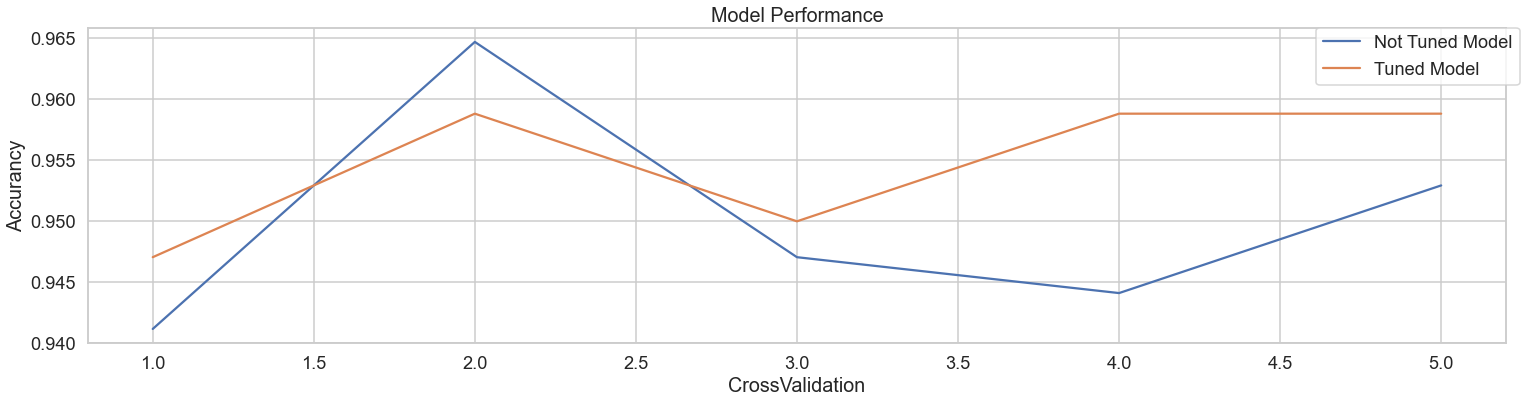

In [15]:
## plot results to see how we did
frame = structureHyperData(CVS_GB_noTune,CVS_GB_Tune)
plotlines(frame)

##### Comments: GBC
This time the tuning leads to a very slight increased performance for the model. The performance for the tuned models seemed a bit more stable over the folds compare to the non-tuned one. The average score at around 95% is better than the decision tree that had around 92%.

#### Tunning Hyperparameters - RandomForestClassifier

In [16]:
# grid search
parameters = {
    'max_depth': [1, 2, 3, 4,5,6,7, 8,9,10,15,20,30,40,50],
     "min_samples_split": np.linspace(0.001, 0.5, 12),
     "min_samples_leaf": np.linspace(0.001, 0.5, 10),
    'criterion':['gini','entropy'],
    "max_features":["log2","sqrt"],
    }

#passing the scoring function in the GridSearchCV
clf = GridSearchCV(RandomForestClassifier(), parameters,  refit=False,cv=2, n_jobs=-1) # scoring=scoring,
# train
clf.fit(Xtrain, Ytrain)

print ("Best Score: {}".format(clf.best_score_))
print ("Best params: {}".format(clf.best_params_))

Best Score: 0.94
Best params: {'criterion': 'gini', 'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 0.001, 'min_samples_split': 0.001}


In [17]:
# create non-tuned RFC model
rfr = RandomForestClassifier(n_estimators = 100, random_state = 42) 
# train
rfr.fit(Xtrain, Ytrain)
# cross validate
CVS_RF = cross_val_score(rfr, Xtrain, Ytrain )

# create tuned RFC model
rfr_tune = RandomForestClassifier(criterion = 'entropy',
                                 max_depth = 40 ,
                                 max_features = 'sqrt',
                                 min_samples_leaf = 0.001,
                                 min_samples_split = 0.001
                                 ) 
# train
rfr_tune.fit(Xtrain, Ytrain)
# cross validate
CVS_RF_Tuned = cross_val_score(bgc_tuned, Xtrain, Ytrain )

Average Non-Tuned Model: 0.939
Average Tuned Model: 0.954


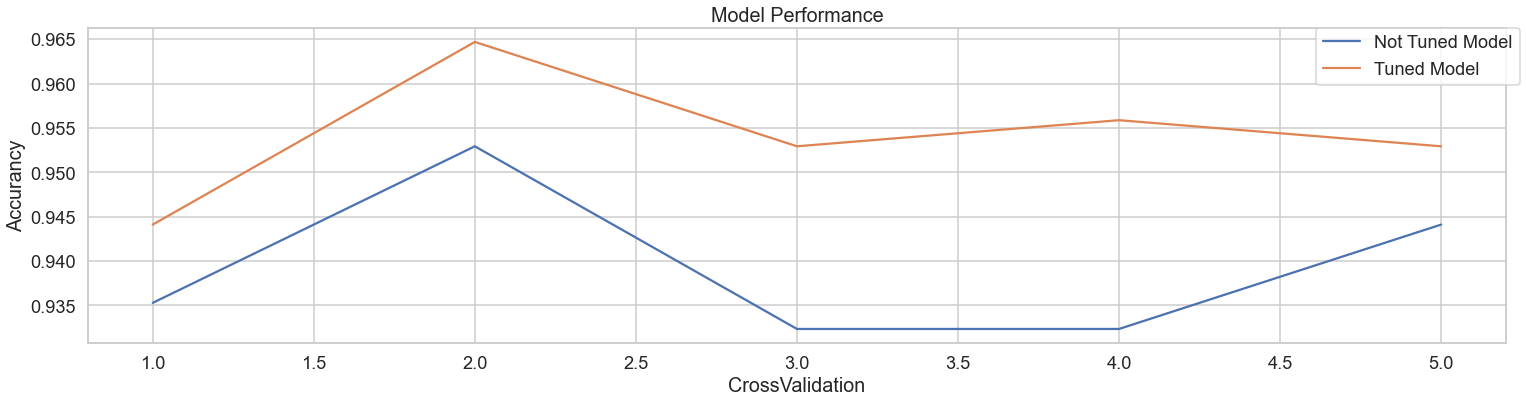

In [18]:
## plot results to see how we did
frame = structureHyperData(CVS_RF,CVS_RF_Tuned)
plotlines(frame)

##### Comment: RFC
By reviewing the accurancy on the train data for the tuned and non-tuned models we can see that the tuned model performs slightly better with higher scores for every fold and on average. The tuned model is having similar performance at 95% accuracy as the GBC.

### Step 4. Final evaluation
When you have found a classifier that gives a high accuracy in the cross-validation evaluation, train it on the whole training set and evaluate it on the held-out test set.

For the report. In your submitted report, please include a description of the classifier you selected and report its accuracy. (At this point, we are of course not asking you to describe internal workings of various machine learning models that we will cover in detail at later points during the course, but you are of course free to read about them if you're interested.)

In [19]:
## Store and structure model results on test data
models = [dtc,dtc_tuned,bgc,bgc_tuned,rfr,rfr_tune]
Results = []

for i in models:
    i.fit(Xtrain, Ytrain)
    Yguess = i.predict(Xtest)
    Results.append(accuracy_score(Ytest, Yguess))

ResultsFrame = pd.DataFrame(Results)
ResultsFrame['Model'] = ['DT','DT','GB','GB','RF','RF']
ResultsFrame['HyperParametertuned'] = ['N','Y','N','Y','N','Y']
ResultsFrame.columns = ['Accurancy', 'Model','HyperParametertuned']

(0.85, 0.95)

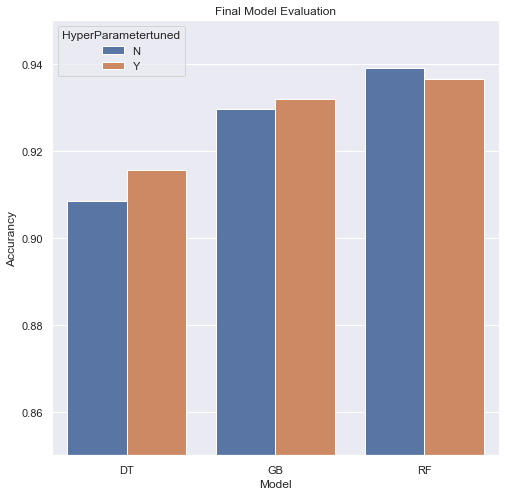

In [20]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(8, 8))

# grouped barplot
plt.title("Final Model Evaluation")
g = sns.barplot(x="Model", y="Accurancy", hue="HyperParametertuned", data=ResultsFrame, ci=0.9);
g.set_ylim(0.85, 0.95)

##### Analysis:
 
The chart above shows the accuracy score on the test data from all models, when tuned (orange) and not tuned (blue).
 
The results are quite different from the initial test with the non tuned models on the train data where Gradient Boost had the best performance.
 
On the test data we see increased performance from the tuning of the models on Decision Tree and Gradient Boosting classifiers. However, the tuned Random Forest classifier performs worse than the non-tuned version (we are probably missing some interval for some hyperparameter) and due to time we have to limit our analysis here.
 
The winning model will be the initial random forest model, which almost scores 94 percent on the test data.


